<a href="https://colab.research.google.com/github/LongS1eeper/ML-DL_Prac/blob/%ED%98%BC%EA%B3%B5/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# MNIST 데이터 로드하여 저장
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 모델을 만드는 함수
def model_fn(a_layer=None):

    # Sequential() 모델 생성 → 층을 순차적으로 쌓는 구조
    model = keras.Sequential()

    # 1차원으로 조작
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    # 층 형성
    if a_layer:  # 만약 입력 값이 있다면
        model.add(a_layer)    # 모델의 은닉층 뒤에 입력값을 층으로 삽입

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# history 변수에 저장
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)
# verbose = 0 : 훈련 과정 출력 X, verbose = 2 : 진행막대 빼고 출력

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8890 - loss: 0.3009
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8911 - loss: 0.3013
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8939 - loss: 0.3010
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8913 - loss: 0.3052
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8934 - loss: 0.3046


In [36]:
print(history.history)

{'accuracy': [0.8894791603088379, 0.8911458253860474, 0.8930833339691162, 0.8923333287239075, 0.8940208554267883], 'loss': [0.2994835376739502, 0.29940247535705566, 0.3013988733291626, 0.30129191279411316, 0.3028661608695984]}


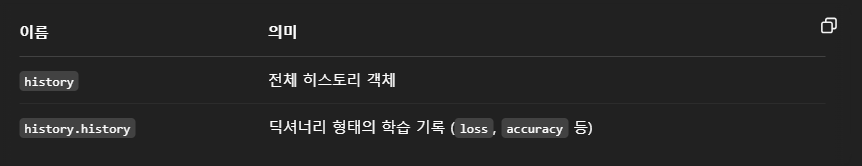

In [6]:
# history 변수에 저장 위 정확도와 손실 저장
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


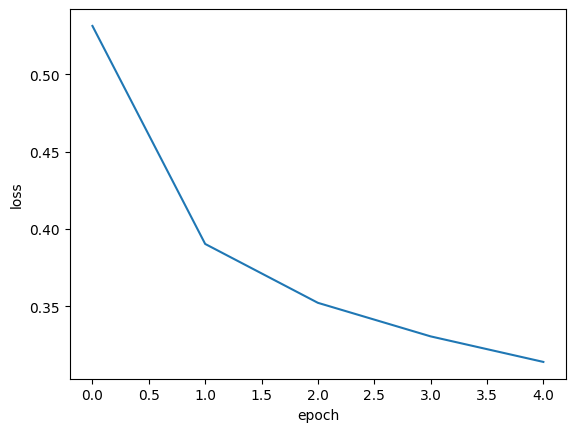

In [7]:
# 손실값 변화 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

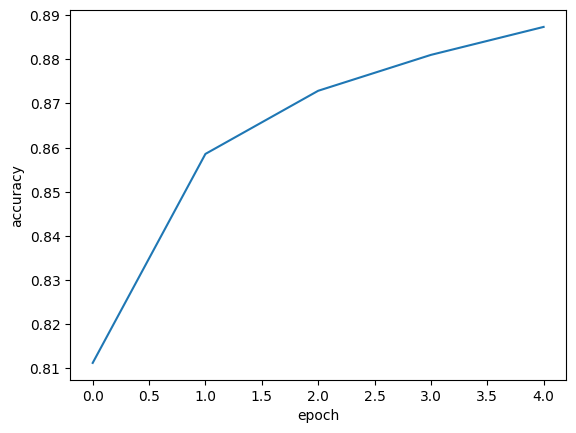

In [8]:
# 정확도 변화 확인
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 에포크 횟수 20회로 늘리기
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

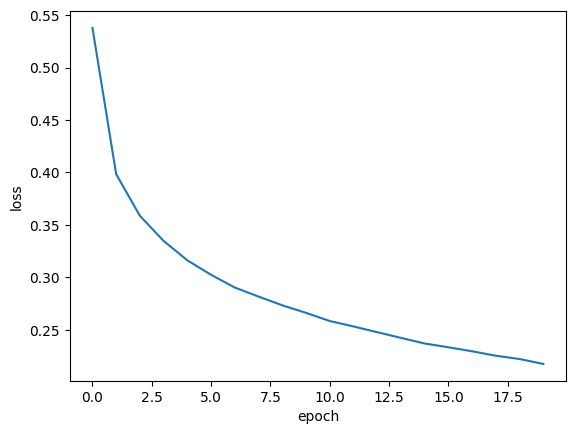

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

* 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실함수의 값을 확인하는 것이 더 나음
* 인공신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실함수이기 때문

In [11]:
model = model_fn()
# 모델이 정수로 되어있는 경우에 쓰는 손실함수 (원핫코딩이 아닐때)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


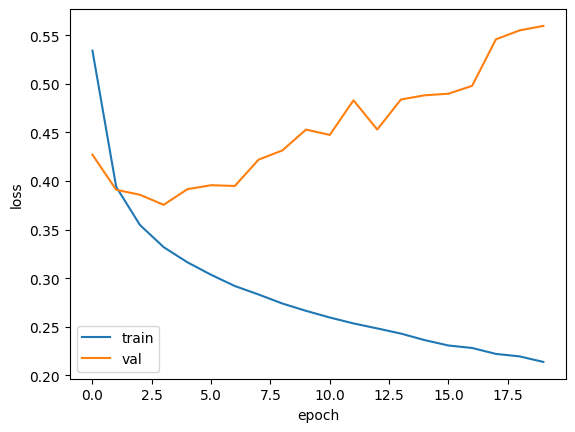

In [13]:
# val붙은건 검증 모델
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 아래 보면 과대 적합 발생

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

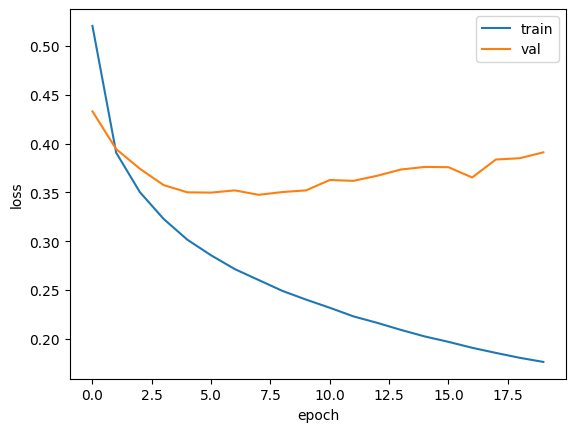

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합이 많이 줄어든 모습 -> 20번째로 가는 동안 상승값 감소

## 드롭아웃

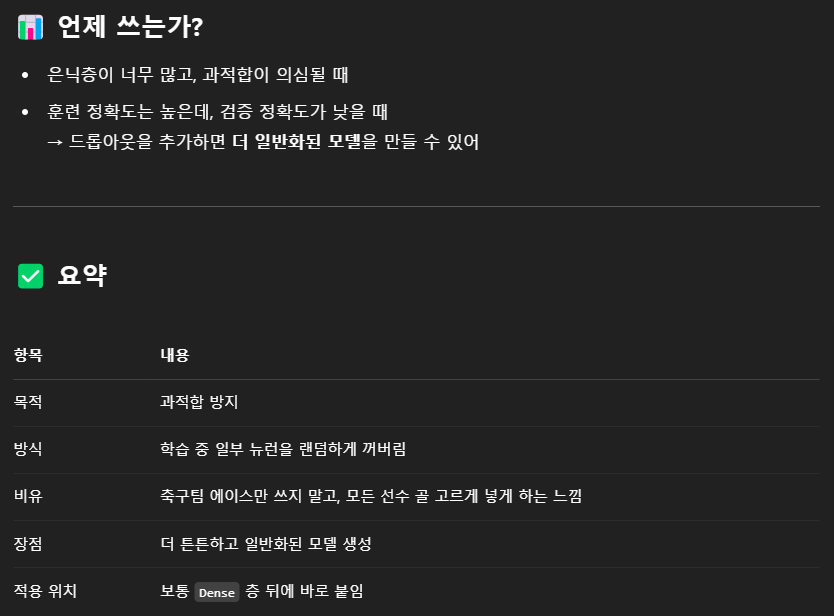

In [16]:
# 몇 퍼센트의 뉴런을 끌 건지 (0.3 = 30%)
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 평가와 예측에는 자동으로 드롭아웃 모델이 작동하지 않도록 되어있음
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

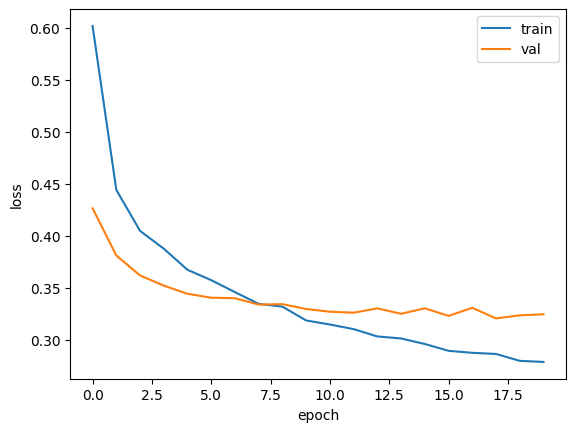

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 10번째에서 손실이 거의 고정되므로 에포크 횟수를 10번으로 조정

## 모델 저장과 복원

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [20]:
# 모델 구조와 파라미터를 한번에 저장하는 메서드 save()
model.save('model-whole.keras')

In [21]:
# 파라미터만(가중치 등) 저장하는 간편한 메서드 -> 파라미터를 HDF5 포멧으로 저장하므로 weight.h5로 끝나야함
# 모델에 삽입용도
model.save_weights('model.weights.h5')

In [22]:
# cmd에서 두 파일이 잘 만들어졌는지 확인
!ls -al model*

-rw-r--r-- 1 root root 976600 Apr 20 10:59 model.weights.h5
-rw-r--r-- 1 root root 979391 Apr 20 10:59 model-whole.keras


##### 1. 훈련을 하지 않은 새로운 모델을 만든 후 model-weights.h5 파일에서 훈련된 파라미터를 읽어서 사용

In [23]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [24]:
import numpy as np

##### 검증 데이터가 예측한 결과가 얼마나 정확한지 계산하기
# predict 메서드는 예측을 수행하며 샘플마다 10개의 클래스에 대한 확률 반환 [[0.01, 0.02 - 0.3], []] 이런 식으로
# axis가 0이면 열 최댓값, 1이면 행 최댓값 인덱스 반환
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# (12000,10)크기의 배열 반환 -> 그 중 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8804166666666666


##### 2. 새로운 모델을 바로 만들어 사용

In [25]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8824 - loss: 0.3254


[0.3309383690357208, 0.8804166913032532]

## 콜백

* 콜백은 훈련 중 자동으로 모델을 저장하거나 중단하는 기능을 담담
* 여기서는 ModelCheckpoint를 통해 가장 좋은 성능의 모델을 저장하고, 훈련 후 다시 그 모델을 불러와 평가에 사용하는 것

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련 도중 가장 좋은 모델을 자동으로 best-model.keras 이름으로 저장 -> 조기종료
# 과대 적합 전 모델 저장하기 위함
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [27]:
# 최상의 모델로 다시 분석 시작하기 위함
model = keras.models.load_model('best-model.keras')

# 손실, 정확도를 리스트로 반환
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3159


[0.3185122013092041, 0.8869166374206543]

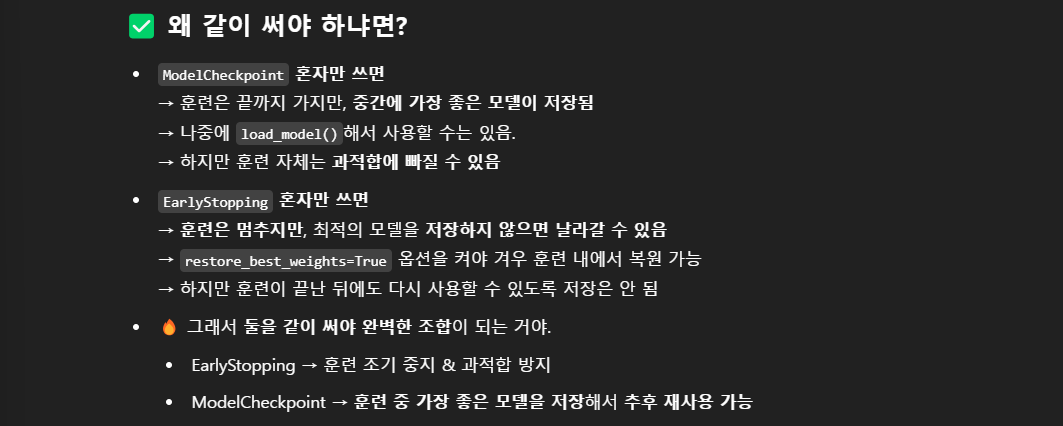

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,  # patience: 2번 연속 검증 점수 향상 없을경우 멈춤
                                                  restore_best_weights=True) # restore : 검증 손실이 가장 낮은 모델로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])  # early_stopping을 통해 훈련을 도중에 중지하도록 함 -> 메모리 낭비 제한

In [29]:
# 몇번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

# 12는 열세번째 에포크에서 훈련이 중지되었다는 의미 -> 11번째 에포크가 최상의 모델

14


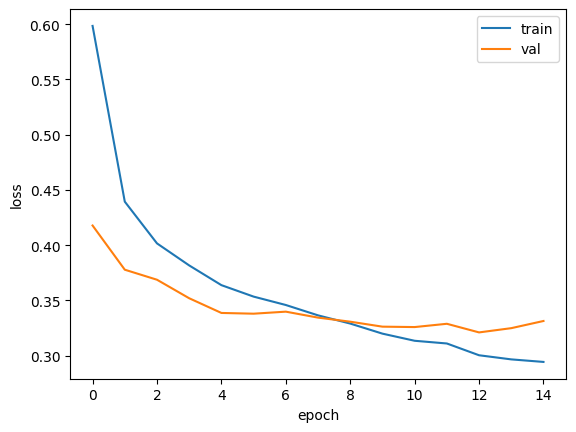

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3153


[0.3210428059101105, 0.8856666684150696]